In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [2]:
# import data for users who have written at least one review about a businesses in AZ
users = pd.read_csv('./users_oh.csv') 

In [3]:
# check the shape 
users.shape

(92622, 22)

In [4]:
# check the head
users.head(1)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,l6BmjZMeQD3rDxWUbiAiow,Rashmi,95,2013-10-08 23:11:33,84,17,25,"2015,2016,2017","c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",5,...,0,0,0,0,1,1,1,1,2,0


In [5]:
# INITIAL DATA CLEAN 

In [6]:
# check for null values
users.notnull().sum()

user_id               92622
name                  92622
review_count          92622
yelping_since         92622
useful                92622
funny                 92622
cool                  92622
elite                  6233
friends               92622
fans                  92622
average_stars         92622
compliment_hot        92622
compliment_more       92622
compliment_profile    92622
compliment_cute       92622
compliment_list       92622
compliment_note       92622
compliment_plain      92622
compliment_cool       92622
compliment_funny      92622
compliment_writer     92622
compliment_photos     92622
dtype: int64

In [7]:
# fill 'elite' nan values with zeros but create as a new column
users['elite_no_nan'] = users.elite.fillna(0)
users.notnull().sum()

user_id               92622
name                  92622
review_count          92622
yelping_since         92622
useful                92622
funny                 92622
cool                  92622
elite                  6233
friends               92622
fans                  92622
average_stars         92622
compliment_hot        92622
compliment_more       92622
compliment_profile    92622
compliment_cute       92622
compliment_list       92622
compliment_note       92622
compliment_plain      92622
compliment_cool       92622
compliment_funny      92622
compliment_writer     92622
compliment_photos     92622
elite_no_nan          92622
dtype: int64

In [8]:
# INITIAL STAR RATING ANALYSIS 

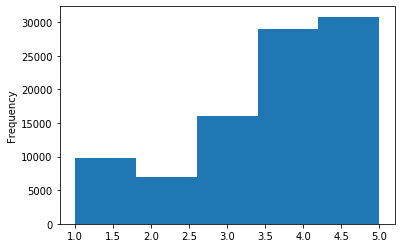

In [9]:
# Check the distribution of users average star rating
users.average_stars.plot(kind='hist', bins=5);

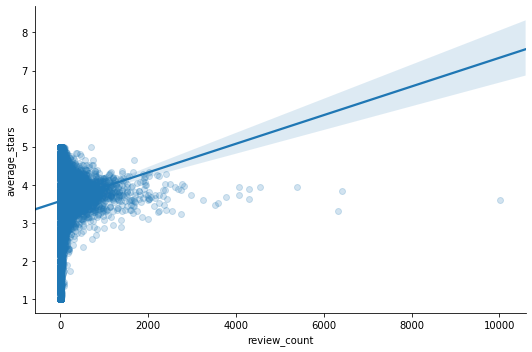

In [10]:
# Check the correlation between review count and star rating 
sns.lmplot(x='review_count', y='average_stars', data=users, aspect=1.5, scatter_kws={'alpha':0.2});

In [11]:
# break out by ranges of the number of reviews written per user
ranges = [0,1,3,5,10,20,50,100,200,500,1000, 5000, 15000]
users.groupby(pd.cut(users.review_count, ranges)).count()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,elite_no_nan
review_count,,,,,,,,,,,,,,,,,,,,,
"(0, 1]",17517,17517,17517,17517,17517,17517,17517,0,17517,17517,...,17517,17517,17517,17517,17517,17517,17517,17517,17517,17517
"(1, 3]",19641,19641,19641,19641,19641,19641,19641,1,19641,19641,...,19641,19641,19641,19641,19641,19641,19641,19641,19641,19641
"(3, 5]",10589,10589,10589,10589,10589,10589,10589,2,10589,10589,...,10589,10589,10589,10589,10589,10589,10589,10589,10589,10589
"(5, 10]",13407,13407,13407,13407,13407,13407,13407,0,13407,13407,...,13407,13407,13407,13407,13407,13407,13407,13407,13407,13407
"(10, 20]",11277,11277,11277,11277,11277,11277,11277,10,11277,11277,...,11277,11277,11277,11277,11277,11277,11277,11277,11277,11277
"(20, 50]",9936,9936,9936,9936,9936,9936,9936,578,9936,9936,...,9936,9936,9936,9936,9936,9936,9936,9936,9936,9936
"(50, 100]",4477,4477,4477,4477,4477,4477,4477,1470,4477,4477,...,4477,4477,4477,4477,4477,4477,4477,4477,4477,4477
"(100, 200]",2915,2915,2915,2915,2915,2915,2915,1786,2915,2915,...,2915,2915,2915,2915,2915,2915,2915,2915,2915,2915
"(200, 500]",2019,2019,2019,2019,2019,2019,2019,1618,2019,2019,...,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019


In [12]:
# FRIENDS ANALYSIS 

In [13]:
# Check an example of friend data
users['friends'][0]

'c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g, ajcnq75Z5xxkvUSmmJ1bCg, BSMAmp2-wMzCkhTfq9ToNg, jka10dk9ygX76hJG0gfPZQ, dut0e4xvme7QSlesOycHQA, l4l5lBnK356zBua7B-UJ6Q, 0HicMOOs-M_gl2eO-zES4Q, _uI57wL2fLyftrcSFpfSGQ, T4_Qd0YWbC3co6WSMw4vxg, iBRoLWPtWmsI1kdbE9ORSA, xjrUcid6Ymq0DoTJELkYyw, GqadWVzJ6At-vgLzK_SKgA, DvB13VJBmSnbFXBVBsKmDA, vRP9nQkYTeNioDjtxZlVhg, gT0A1iN3eeQ8EMAjJhwQtw, 6yCWjFPtp_AD4x93WAwmnw, 1dKzpNnib-JlViKv8_Gt5g, 3Bv4_JxHXq-gVLOxYMQX0Q, ikQyfu1iViYh8T0us7wiFQ, f1GGltNaB7K5DR1jf3dOmg, tgeFUChlh7v8bZFVl2-hjQ, -9-9oyXlqsMG2he5xIWdLQ, Adj9fBPVJad8vSs-mIP7gw, Ce49RY8CKXVsTifxRYFTsw, M1_7TLi8CbdA89nFLlH4iw, wFsNv-hqbW_F5-IRqfBN6g, 0Q1L7zXHocaUZ2gsG2XJeg, cBFgmOCBdhYa0xoFEAzp_g, VrD_AgiFvzqtlR15vir3SQ, cpE-7HK514Sr5vpSen9CEQ, F1UYelhPFB-zIKlt0ygIZg, CQAL1hvsLMCzuJf9AglsXw, 1KnY1wr15WfEWIRLB9IS6g, QWFQ-kXBiLbid-lm5Jr3dQ, nymT8liFugCrM16lTy0ZfQ, qj69bdd885heDvUPCyHd2Q, DySCZZcgbdrlHgEovk5y9w, lZMJIDuvhT9Dy4KyquLXyA, b_9Gn7wS93AoPZPR0dIJqQ, N07g1IaLh0_6sUjtiSRe4w, YdfPX_7DxSnKvvd

In [14]:
# Creating a column for friend count

# create new dataframe with only rows for users who have no 'friends'
no_friends_df = users[users['friends'] == 'None']
 
# create new column and populate with zeros
def function_friends_none(z):
    if z == 'None':
        return 0
    else:
        return 1
no_friends_df['friend_count'] = no_friends_df['friends'].apply(function_friends_none)
# check there are no '1's in the the column
no_friends_df['friend_count'].sum()
# filter columns of the dataframe and create a new one for merging 
no_friends_filtered_df = no_friends_df[['user_id','friend_count']]
len(no_friends_filtered_df)
no_friends_filtered_df

# create new dataframe with only rows for users who have one or more 'friends'
one_or_more_friends_df = users[users['friends'] != 'None']
# Count the number of friends
one_or_more_friends_df['friend_count'] = one_or_more_friends_df['friends'].str.count(',')+1
# filter columns of the dataframe and create a new one for merging 
one_or_more_friends_filtered_df = one_or_more_friends_df[['user_id','friend_count']]


/Users/hanhuang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/hanhuang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [15]:
# merge the two new dataframes 
friend_count_df = pd.concat([no_friends_filtered_df, one_or_more_friends_filtered_df])

In [16]:
friend_count_df 

,user_id,friend_count
7395,8iFdGflRabklAt3G_Pd0ug,0
7396,TsZxDJuhgReq8SeoQYSy8g,0
7397,zunWrhzfbH1UUBtZbRB_QQ,0
7398,PeKouqRuQU7eJM24fUm6KQ,0
7399,fs0xfZ1JKigEHO_nB0R7mQ,0
...,...,...
91302,zi_SpBv3Born9kXEc7LlIA,9
91422,bICtVzEenh9UtEoj-pMTtg,1
91726,Fuv1shWKfQvS7uLOICpR7w,2
92075,xOfUwumhFdn39OaweGtN-Q,1


In [17]:
users = users.merge(friend_count_df , on='user_id', how='left')
users.head(1)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,elite_no_nan,friend_count
0,l6BmjZMeQD3rDxWUbiAiow,Rashmi,95,2013-10-08 23:11:33,84,17,25,"2015,2016,2017","c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",5,...,0,0,1,1,1,1,2,0,"2015,2016,2017",99


In [18]:
# create categories for number of friends
criteria = [users['friend_count'].between(0,0), users['friend_count'].between(1,10), users['friend_count'].between(11,50), users['friend_count'].between(51,200), users['friend_count'].between(201,200000)]
values = ['0', '1-10', '11-50', '51-200', '201+']

users['count_of_friends_segments'] = np.select(criteria, values, 0)
users.count_of_friends_segments.value_counts(normalize=True).sort_index(axis = 0)

0         0.425838
1-10      0.202554
11-50     0.170618
201+      0.047527
51-200    0.153462
Name: count_of_friends_segments, dtype: float64

In [20]:
# CHECK FOR CORRELATIONS

In [21]:
# check for correlations with average_stars across all numeric features
# There are no linear correlations 
abs(users.corr()['average_stars']).sort_values(ascending=False)

average_stars         1.000000
friend_count          0.045898
review_count          0.039515
fans                  0.019842
useful                0.013068
cool                  0.011531
funny                 0.008409
compliment_more       0.007841
compliment_writer     0.007530
compliment_funny      0.007124
compliment_cool       0.007124
compliment_plain      0.006428
compliment_hot        0.005712
compliment_cute       0.005623
compliment_list       0.003813
compliment_profile    0.003686
compliment_photos     0.002995
compliment_note       0.002512
Name: average_stars, dtype: float64

In [22]:
# check for correlations with review count 
# Shows that people who write many reviews are likely to also have more friends and get more 'like' type responses
abs(users.corr()['review_count']).sort_values(ascending=False)

review_count          1.000000
useful                0.658629
fans                  0.615179
cool                  0.565227
funny                 0.528175
friend_count          0.495302
compliment_writer     0.312488
compliment_cool       0.297670
compliment_funny      0.297670
compliment_plain      0.274330
compliment_more       0.262602
compliment_hot        0.248247
compliment_cute       0.191986
compliment_list       0.183908
compliment_profile    0.152151
compliment_note       0.117957
compliment_photos     0.108047
average_stars         0.039515
Name: review_count, dtype: float64

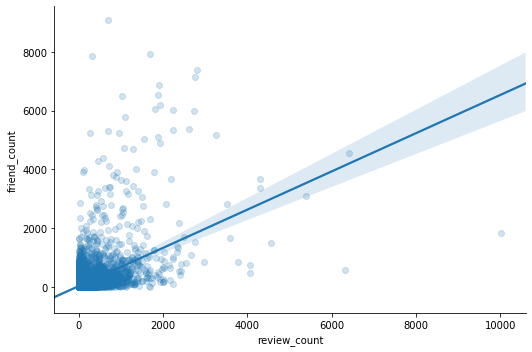

In [23]:
# Check visual correlation between 'review count' and 'friend_count'
sns.lmplot(x='review_count', y='friend_count', data=users, aspect=1.5, scatter_kws={'alpha':0.2});

In [24]:
# now check correlations against count_of_friends
# In turn a users friends are likely to click on some different types of 'likes' like features such as 'useful
abs(users.corr()['friend_count']).sort_values(ascending=False)

friend_count          1.000000
fans                  0.737432
useful                0.583478
cool                  0.540154
funny                 0.500719
review_count          0.495302
compliment_cool       0.417742
compliment_funny      0.417742
compliment_plain      0.411666
compliment_writer     0.383638
compliment_more       0.329397
compliment_hot        0.327138
compliment_cute       0.314171
compliment_list       0.246368
compliment_profile    0.224848
compliment_photos     0.179746
compliment_note       0.149539
average_stars         0.045898
Name: friend_count, dtype: float64

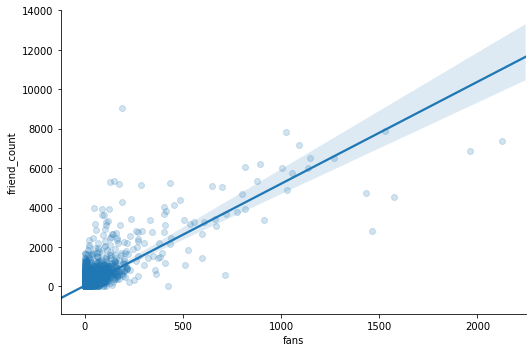

In [25]:
# Check visual correlation between 'fans' and 'friend_count'
sns.lmplot(x='fans', y='friend_count', data=users, aspect=1.5, scatter_kws={'alpha':0.2});

In [26]:
# Now check correlations with 'useful' 
abs(users.corr()['useful']).sort_values(ascending=False)

useful                1.000000
cool                  0.988102
funny                 0.962441
fans                  0.807983
compliment_funny      0.774833
compliment_cool       0.774833
compliment_writer     0.755024
compliment_plain      0.728204
compliment_more       0.712050
review_count          0.658629
compliment_hot        0.640622
compliment_cute       0.597813
compliment_profile    0.590254
friend_count          0.583478
compliment_list       0.581239
compliment_photos     0.555308
compliment_note       0.320321
average_stars         0.013068
Name: useful, dtype: float64

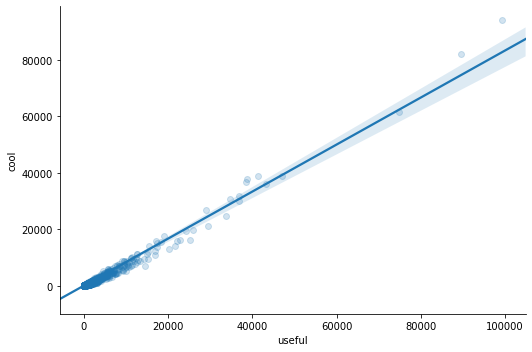

In [27]:
# Check correlation between 'useful' and 'cool'
sns.lmplot(x='useful', y='cool', data=users[users['friend_count'] != 0], aspect=1.5, scatter_kws={'alpha':0.2});

In [28]:
# check for non zero values
# particularly as it relates to 'useful'
users.astype(bool).sum(axis=0)

user_id                      92622
name                         92622
review_count                 92619
yelping_since                92622
useful                       72658
funny                        50914
cool                         51576
elite                        92622
friends                      92622
fans                         20789
average_stars                92622
compliment_hot                8900
compliment_more              10442
compliment_profile            3664
compliment_cute               2538
compliment_list               1401
compliment_note              15713
compliment_plain             16702
compliment_cool              13885
compliment_funny             13885
compliment_writer            11062
compliment_photos             6132
elite_no_nan                  6233
friend_count                 53180
count_of_friends_segments    92622
dtype: int64

In [29]:
# Analysis to check how some the most highly correlated features to  'useful' where the data is driven via other users overlap 
# The feature 'useful' can to a large extent be used as a default indicator for other "like" type features

# create a new dataframe 
overlap_with_useful = users

# if 'useful' is not a zero return a 1 otherwise return a zero
def function_a(z):
    if z == 0:
        return 0
    else:
        return 1
overlap_with_useful['a'] = overlap_with_useful['useful'].apply(function_a)

# if 'funny' is not a zero return a 1 otherwise return a zero
def function_b(z):
    if z == 0:
        return 0
    else:
        return 1
overlap_with_useful['b'] = overlap_with_useful['funny'].apply(function_b)

# if 'cool' is not a zero return a 1 otherwise return a zero
def function_c(z):
    if z == 0:
        return 0
    else:
        return 1
overlap_with_useful['c'] = overlap_with_useful['cool'].apply(function_c)

# if 'fans' is not a zero return a 1 otherwise return a zero
def function_d(z):
    if z == 0:
        return 0
    else:
        return 1
overlap_with_useful['d'] = overlap_with_useful['fans'].apply(function_d)

# add up values for the newly added columns
overlap_with_useful['sum'] = overlap_with_useful.a + overlap_with_useful.b + overlap_with_useful.c + overlap_with_useful.d
# if the sum of the newly added columns return a zero else return a 1 in a new column
def function_e(z):
    if z == 0:
        return 0
    else:
        return 1    
overlap_with_useful['binary'] = overlap_with_useful['sum'].apply(function_e)

# read result as saying only 4.7% more coverage coming from using these additional features
(overlap_with_useful['binary'].sum() - overlap_with_useful['useful'].astype(bool).sum(axis=0)) / overlap_with_useful['useful'].astype(bool).sum(axis=0) 

0.038577995540752565

In [30]:
# average number of useful indicators per review
users.useful.mean() / users.review_count.mean()

2.034371633210051

In [32]:
users.columns.tolist()

['user_id',
 'name',
 'review_count',
 'yelping_since',
 'useful',
 'funny',
 'cool',
 'elite',
 'friends',
 'fans',
 'average_stars',
 'compliment_hot',
 'compliment_more',
 'compliment_profile',
 'compliment_cute',
 'compliment_list',
 'compliment_note',
 'compliment_plain',
 'compliment_cool',
 'compliment_funny',
 'compliment_writer',
 'compliment_photos',
 'elite_no_nan',
 'friend_count',
 'count_of_friends_segments',
 'a',
 'b',
 'c',
 'd',
 'sum',
 'binary']

In [44]:
social = users[['review_count','useful', 'fans', 'cool', 'funny', 'friend_count']]
social.corr()


,review_count,useful,fans,cool,funny,friend_count
review_count,1.000000,0.658629,0.615179,0.565227,0.528175,0.495302
useful,0.658629,1.000000,0.807983,0.988102,0.962441,0.583478
fans,0.615179,0.807983,1.000000,0.764727,0.736715,0.737432
cool,0.565227,0.988102,0.764727,1.000000,0.981408,0.540154
funny,0.528175,0.962441,0.736715,0.981408,1.000000,0.500719
friend_count,0.495302,0.583478,0.737432,0.540154,0.500719,1.000000


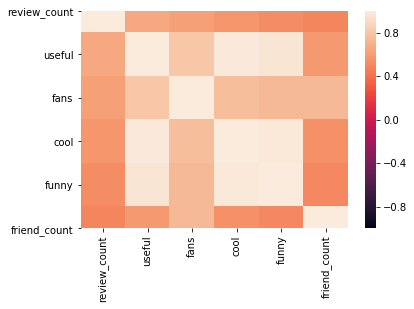

In [48]:
sns.set_palette("coolwarm", 7)
sns.heatmap(social.corr(), vmin=-1, vmax=1) 

In [50]:
# Check the role of Elite reviewers

In [66]:
# elite make up 4.5% of users 
elite = users[users.elite_no_nan != 0]
len(elite)/ len(users)

0.06729502709939324

In [67]:
# elite generate 47% of the reviews
elite.review_count.sum() / users.review_count.sum()

0.5750480744244062

In [68]:
# elite generate 73% of all useful 'likes'
elite.useful.sum() / users.useful.sum()

0.7828097179200151

In [69]:
# elite generate close to three useful indicators for each review they write
elite.useful.mean() / elite.review_count.mean()

2.7693786922626904

In [70]:
# versus close to an average of 1 for non elite
users[users.elite_no_nan == 0].useful.mean() / users[users.elite_no_nan == 0].review_count.mean()

1.0397546693639155

In [71]:
# elite have 25% of all friends
elite.friend_count.sum() / users.friend_count.sum()

0.34471130025897845

In [77]:
elite_social = elite[['review_count','useful', 'fans', 'cool', 'funny', 'friend_count']]
elite_social.corr()

,review_count,useful,fans,cool,funny,friend_count
review_count,1.000000,0.667409,0.596465,0.586455,0.547296,0.482017
useful,0.667409,1.000000,0.799057,0.989931,0.964219,0.632391
fans,0.596465,0.799057,1.000000,0.760393,0.733286,0.815480
cool,0.586455,0.989931,0.760393,1.000000,0.981360,0.592533
funny,0.547296,0.964219,0.733286,0.981360,1.000000,0.549311
friend_count,0.482017,0.632391,0.815480,0.592533,0.549311,1.000000


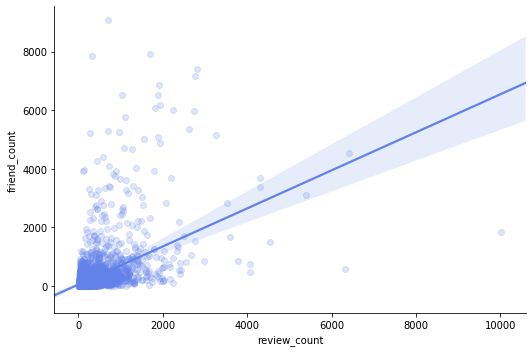

In [78]:
# Check visual correlation between 'review count' and 'friend_count'
sns.lmplot(x='review_count', y='friend_count', data=elite_social, aspect=1.5, scatter_kws={'alpha':0.2});

In [65]:
social.corr()

,review_count,useful,fans,cool,funny,friend_count
review_count,1.000000,0.658629,0.615179,0.565227,0.528175,0.495302
useful,0.658629,1.000000,0.807983,0.988102,0.962441,0.583478
fans,0.615179,0.807983,1.000000,0.764727,0.736715,0.737432
cool,0.565227,0.988102,0.764727,1.000000,0.981408,0.540154
funny,0.528175,0.962441,0.736715,0.981408,1.000000,0.500719
friend_count,0.495302,0.583478,0.737432,0.540154,0.500719,1.000000


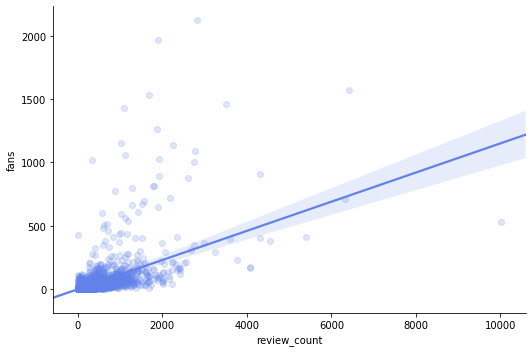

In [76]:
# Check visual correlation between 'review count' and 'friend_count'
sns.lmplot(x='review_count', y='fans', data=social, aspect=1.5, scatter_kws={'alpha':0.2});

In [60]:
len(social)

92622

In [61]:
len(elite)

6233